Complete the exercises below For **Assignment #2**.

First, load the `Tidyverse` package which imports data visualization and wrangling libraries that we need.

In [1]:
# uncomment the code below and execute this cell
 library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


If you are unable to load the `Tidyverse` package, you may not have it installed. Please refer to the assignment `README` for instructions to update your `data730` environment to include the `Tidyverse` package.

## Data visualization

Let's work with the [Palmer Penguins data](https://allisonhorst.github.io/palmerpenguins/).

In [2]:
# uncomment the code below and execute this cell
 library('palmerpenguins')
 glimpse(penguins)

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


We now have a data frame called `penguins` available. Use this table for the following exercises.

### Bar chart

In the cell below make a bar chart that shows how many penguins are in the data from each island. Encode the penguin species as the `fill` attribute of the bars.

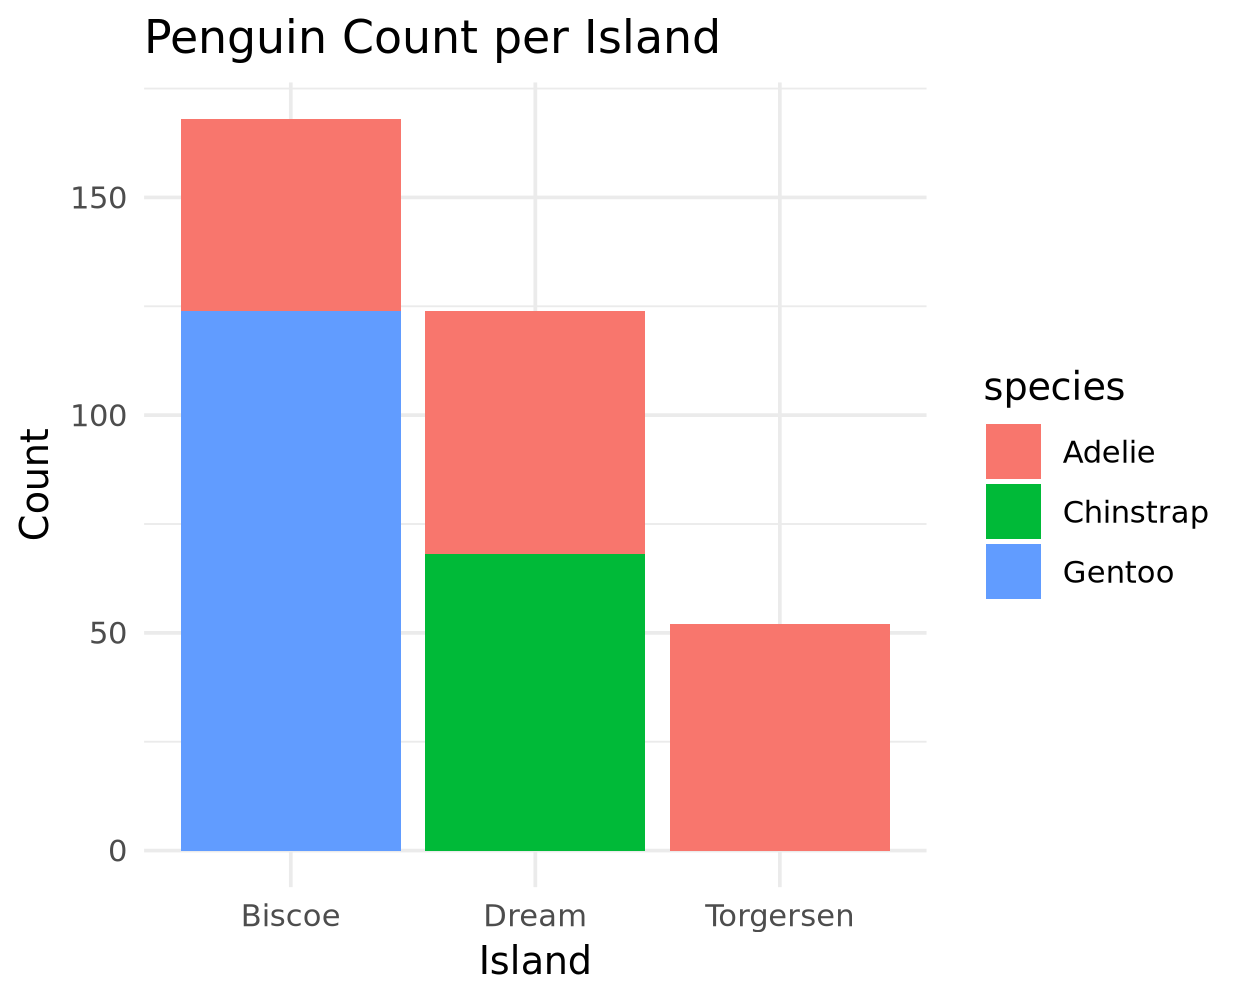

In [4]:
# Bar chart showing penguin count per island with species as fill attribute
penguins %>%
  ggplot(aes(x = island, fill = species)) +
  geom_bar() +
  labs(title = "Penguin Count per Island",
       x = "Island",
       y = "Count") +
  theme_minimal()


**In which islands were *Adelie* penguins observed?** Answer using a [markdown list](https://www.markdownguide.org/basic-syntax/#lists-1) in the cell below. 

⚠️ Remember to switch the cell type to `Markdown`.

In [ ]:
Torgersen
Dream
Biscoe

### Scatter chart

Make a scatter chart of bill depth versus bill length. Color the points by penguin species. Add a `scale` modification to your chart to adjust the color palette (e.g. add `scale_color_brewer(palette = "Set2")`).

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


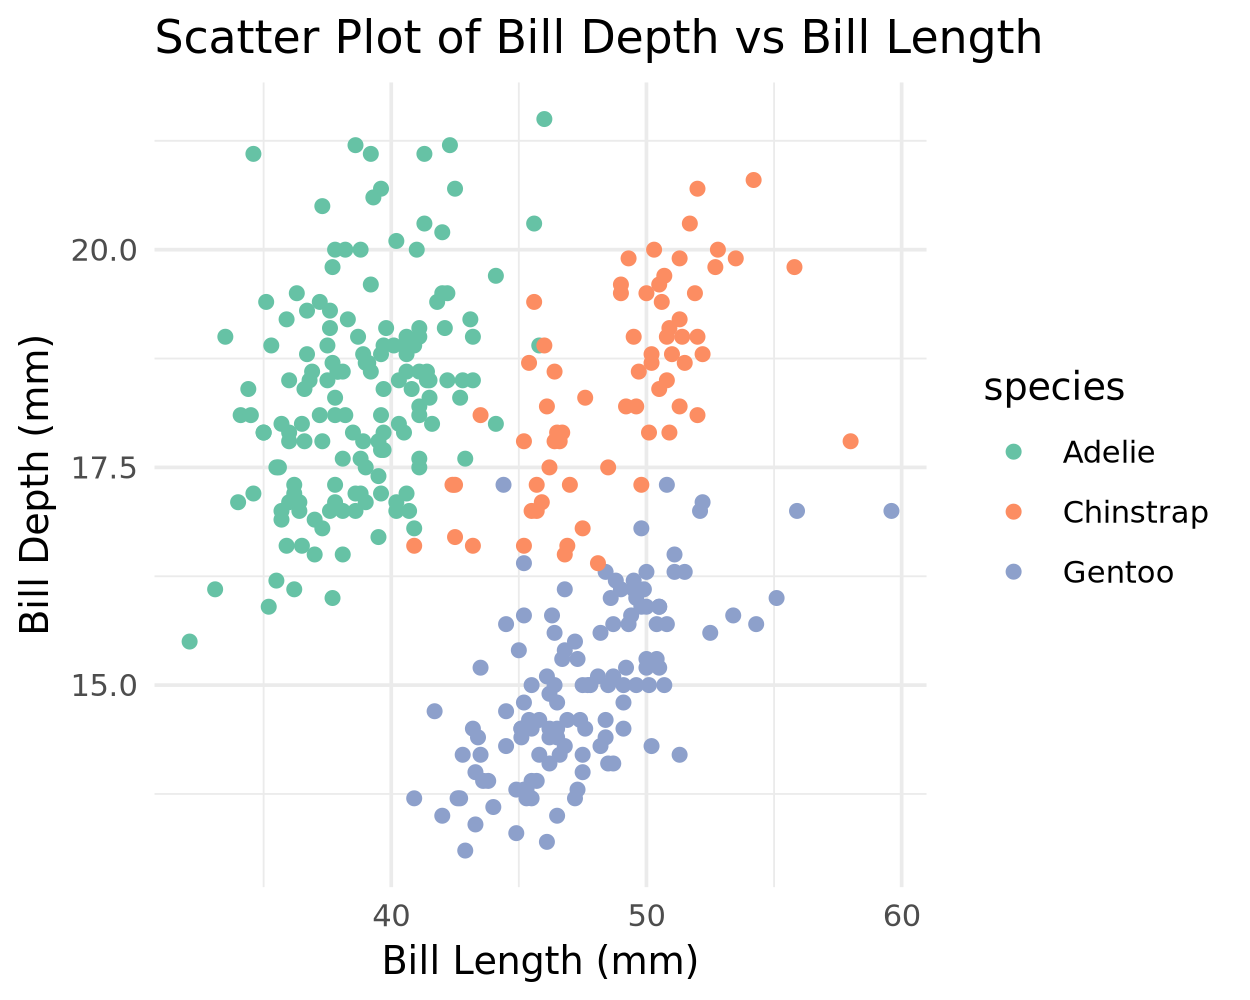

In [5]:
# Scatter plot of bill depth versus bill length colored by penguin species
penguins %>%
  ggplot(aes(x = bill_length_mm, y = bill_depth_mm, color = species)) +
  geom_point() +
  labs(title = "Scatter Plot of Bill Depth vs Bill Length",
       x = "Bill Length (mm)",
       y = "Bill Depth (mm)") +
  scale_color_brewer(palette = "Set2") +
  theme_minimal()


### Histogram

Make a histogram of penguin body mass. 
- Facet your chart by the `sex` column using the `facet_wrap` function and setting the `ncol` parameter to `1`.
- In your `geom_histogram` layer, set the `position` argument to `"identity"` and set `alpha`to a value between `0` and `1`.
- Map penguin species to the `fill` property.
- Adjust the `fill` scale palette similarly to how we adjusted the `color` scale palette above. I.e. change to the [ColorBrewer](https://colorbrewer2.org/) `"Set2"` palette.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


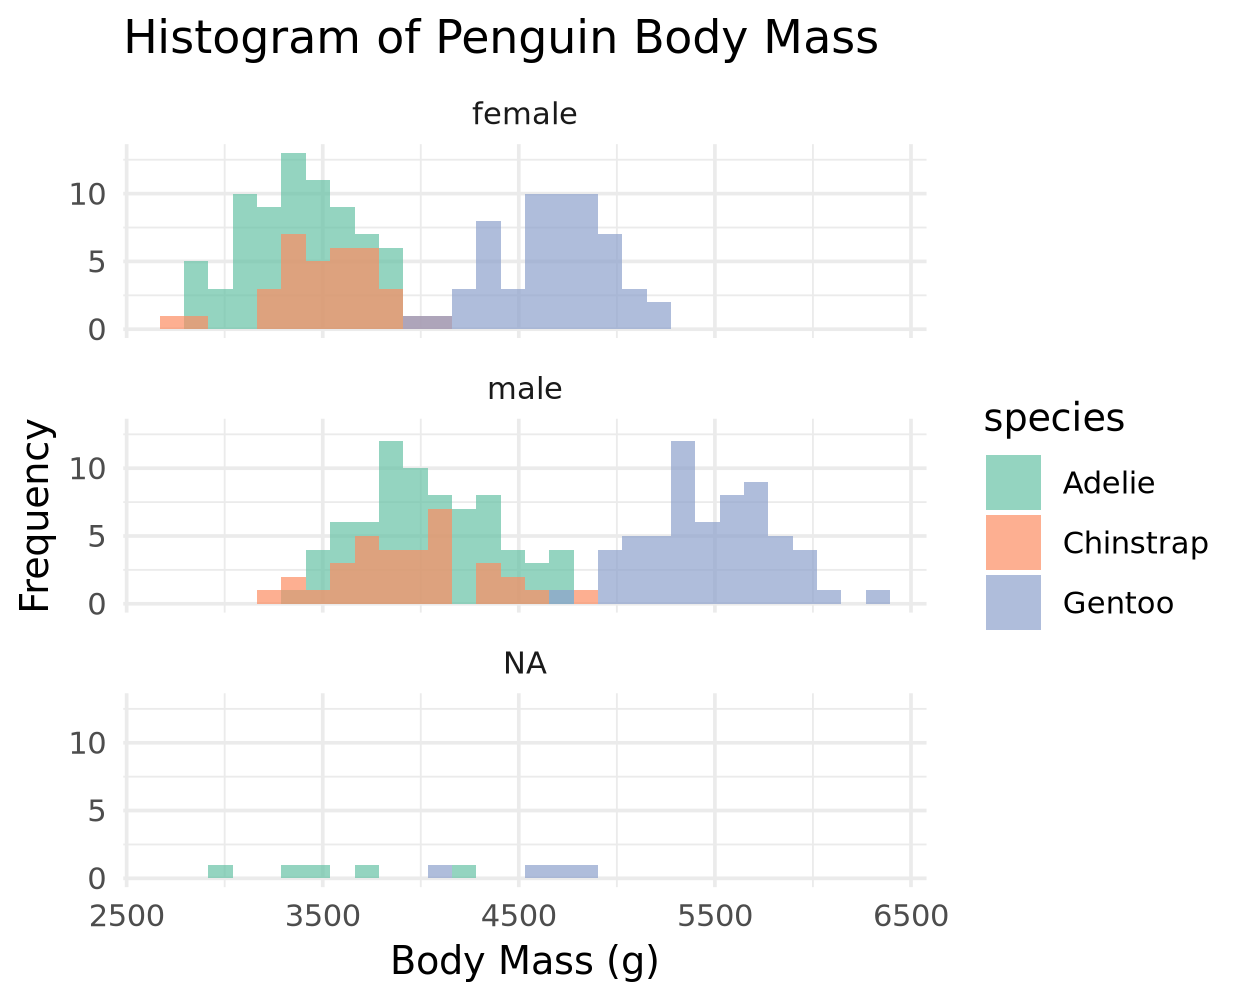

In [6]:
# Histogram of penguin body mass faceted by sex, with species as fill and adjusted fill scale
penguins %>%
  ggplot(aes(x = body_mass_g, fill = species)) +
  geom_histogram(position = "identity", alpha = 0.7, bins = 30) +
  labs(title = "Histogram of Penguin Body Mass",
       x = "Body Mass (g)",
       y = "Frequency") +
  facet_wrap(~sex, ncol = 1) +
  scale_fill_brewer(palette = "Set2") +
  theme_minimal()


What happens when you don't have `position = "identity"` in your `geom_histogram` layer? Answer below in a `Markdown` cell.

In [ ]:
it can resulting in a stacked histogram. 
meaning that each bar represents the count of observations for each bin, 
and bars for different groups different penguin species are stacked on top of each other within each bin.
making it difficult to discern the individual contributions of each group to the overall distribution. 






## Data wrangling

First we are going to bring in a data set to practice with called `txhousing`. You can find some information about `txhousing` [here](https://ggplot2.tidyverse.org/reference/txhousing.html).

In [7]:
# uncomment the next two lines and execute this cell
 data(txhousing)
 glimpse(txhousing)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


Write a code chunk to remove the inventory variable. Save the results in a data frame called `txhousing`. Use `glimpse` or `head` to confirm you have removed the variable.

In [8]:
# Remove the inventory variable from the txhousing data frame
txhousing <- txhousing %>%
  select(-inventory)

# Confirm the removal by viewing the first few rows of the updated data frame
glimpse(txhousing)


Rows: 8,602
Columns: 8
$ city     <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abile…
$ year     <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2…
$ month    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8…
$ sales    <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, 1…
$ volume   <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 12635…
$ median   <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 64500…
$ listings <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, 7…
$ date     <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, 2…


Make a data set called `dallas_sub` that includes data only from the city of Dallas in 2012 & 2013.

In [9]:
# Create a subset of data including only observations from the city of Dallas in 2012 & 2013
dallas_sub <- txhousing %>%
  filter(city == "Dallas" & year %in% c(2012, 2013))

# View the first few rows of the subsetted data frame
head(dallas_sub)


city,year,month,sales,volume,median,listings,date
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dallas,2012,1,2555,509458081,150800,16721,2012.000
Dallas,2012,2,3085,634067291,157100,17173,2012.083
Dallas,2012,3,4068,898320563,167300,17433,2012.167
Dallas,2012,4,4291,983333297,168700,17632,2012.250
Dallas,2012,5,5004,1175419749,175100,17726,2012.333
Dallas,2012,6,5196,1209024869,177900,17587,2012.417


Add a column to the `dallas_sub` data set called `prct_sold` that calculates the percentage of listings that were sold (`sales/listings * 100`). Be sure to save the results also as a data frame called `dallas_sub`.

In [10]:
# Add a column to dallas_sub called prct_sold
dallas_sub <- dallas_sub %>%
  mutate(prct_sold = (sales / listings) * 100)

# View the first few rows of the updated data frame
head(dallas_sub)


city,year,month,sales,volume,median,listings,date,prct_sold
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dallas,2012,1,2555,509458081,150800,16721,2012.000,15.28019
Dallas,2012,2,3085,634067291,157100,17173,2012.083,17.96425
Dallas,2012,3,4068,898320563,167300,17433,2012.167,23.33505
Dallas,2012,4,4291,983333297,168700,17632,2012.250,24.33643
Dallas,2012,5,5004,1175419749,175100,17726,2012.333,28.22972
Dallas,2012,6,5196,1209024869,177900,17587,2012.417,29.54455


Calculate the average percentage of listings that were sold in Dallas in each month of the year based on your `dallas_sub` data set. Save the results of the calculation in an data frame called `dallas_summary`.

In [11]:
# Calculate the average percentage of listings sold in Dallas for each month
dallas_summary <- dallas_sub %>%
  group_by(month) %>%
  summarize(avg_prct_sold = mean(prct_sold, na.rm = TRUE))

# View the summary data frame
dallas_summary


month,avg_prct_sold
<int>,<dbl>
1,20.54462
2,23.47328
3,32.24472
4,34.46954
5,38.20168
6,37.19150
7,37.13028
8,38.51543
9,31.77096


Use `slice_max` to see the top 3 months with the greatest average percentage of listings sold from `dallas_summary`. You do not need to save the results.

In [12]:
# Use slice_max to get the top 3 months with the greatest average percentage of listings sold
dallas_summary %>%
  slice_max(order_by = avg_prct_sold, n = 3)


month,avg_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


Run the following code chunk. Study the code, and the output. Explain in your own words what this code chunk calculated.

In [13]:
#filters the txhousing dataset to include only observations from the city of Dallas in the years 2012 and 2013. 
txhousing |>
  filter(year == 2012 | year == 2013, city == "Dallas") %>%
#calculates the percentage of listings that were sold (prct_sold) for each observation.
  mutate(prct_sold = sales/listings *100) |>
#groups the data by month.
  group_by(month) |>
#calculates the mean percentage of listings sold (mean_prct_sold) for each month.
  summarize(mean_prct_sold = mean(prct_sold)) |>
#selects the top 3 months with the highest average percentage of listings sold.
  slice_max(mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


In [ ]:
# commets where made in the code to describre what each line does
therefore the code chunk identifies the top 3 months in 2012 and 2013 in Dallas 
with the highest average percentage of listings sold, and the same operations is repeated twice,
resulting in the same output being displayed twice.